# Exploratory Data Analysis & Exploration

**This Jupyter Notebook will cover stages of Exploratory Data Anlysis and Data Exploration, including;**

- ### Univariate Analysis
- ### Multivariate Analysis
- ### Seperation of Numiercal & Categorical Values
- ### Replacing Null Values
- ### Outlier Detection
- ### Data Visualisations
    - #### Matplotlib
    - #### Seaborn
    - #### Plotly

Example walkthroguh of Data Exploration Techniques

Using Kaggle Database 'House Prices - Advanced Regression Techniques'

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_train = pd.read_csv("03_Data_Exploration/Data/house_prices/train.csv")

df_train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
#  check how many variables and observations

print(df_train.shape)

(1460, 81)


In [9]:
# check the column names and their data types

df_train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [10]:
# check for duplicate ids and remove them

# check for duplicates for Id
idsUnique = len(set(df_train.Id))
idsTotal = df_train.shape[0]
idsdupe = idsTotal - idsUnique
print(idsdupe)
# drop id col
df_train.drop(['Id'],axis =1,inplace=True)

0


## Exploring the Target Variable

The goal of this competition was to predict the price of a house. These values are stored in the variable **SalePrice**.

Check the descriptive statistics and the histogram:



<Axes: xlabel='SalePrice', ylabel='Count'>

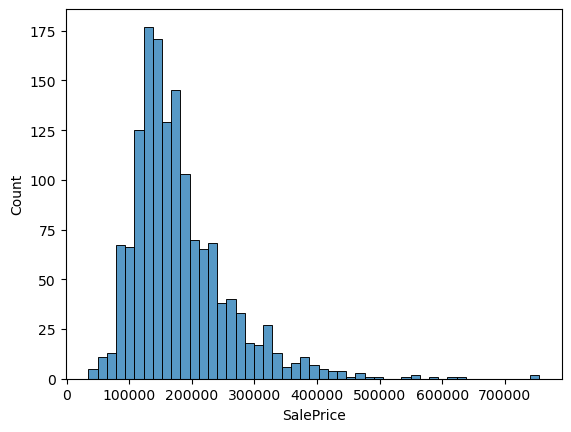

In [11]:
# descriptive statistics
df_train['SalePrice'].describe()
# histogram
sns.histplot(df_train['SalePrice'])

In the graph above we can observe the following things: - It slightly deviates from a normal distribution. 
- It's skewed. 
- It has some outliers (i.e. really huge prices).

### Relationship Between the Target Variable and Predictors

Firstly, let's start with some common sense (or domain knowledge):

- Do we think about this variable when we are buying a house? 
    - (e.g. when we think about the house of our dreams, do we care about its 'Masonry veneer type'?).
- If so, how important would this variable be? 
    - (e.g. what is the impact of having 'Excellent' material on the exterior instead of 'Poor'? And of having 'Excellent' instead of 'Good'?).
- Is this information already described in any other variable? 
    - (e.g. if 'LandContour' gives the flatness of the property, do we really need to know the 'LandSlope'?).


In [12]:
# print a list of all columns

sorted(list(df_train.columns))

['1stFlrSF',
 '2ndFlrSF',
 '3SsnPorch',
 'Alley',
 'BedroomAbvGr',
 'BldgType',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtFinType1',
 'BsmtFinType2',
 'BsmtFullBath',
 'BsmtHalfBath',
 'BsmtQual',
 'BsmtUnfSF',
 'CentralAir',
 'Condition1',
 'Condition2',
 'Electrical',
 'EnclosedPorch',
 'ExterCond',
 'ExterQual',
 'Exterior1st',
 'Exterior2nd',
 'Fence',
 'FireplaceQu',
 'Fireplaces',
 'Foundation',
 'FullBath',
 'Functional',
 'GarageArea',
 'GarageCars',
 'GarageCond',
 'GarageFinish',
 'GarageQual',
 'GarageType',
 'GarageYrBlt',
 'GrLivArea',
 'HalfBath',
 'Heating',
 'HeatingQC',
 'HouseStyle',
 'KitchenAbvGr',
 'KitchenQual',
 'LandContour',
 'LandSlope',
 'LotArea',
 'LotConfig',
 'LotFrontage',
 'LotShape',
 'LowQualFinSF',
 'MSSubClass',
 'MSZoning',
 'MasVnrArea',
 'MasVnrType',
 'MiscFeature',
 'MiscVal',
 'MoSold',
 'Neighborhood',
 'OpenPorchSF',
 'OverallCond',
 'OverallQual',
 'PavedDrive',
 'PoolArea',
 'PoolQC',
 'RoofMatl',
 'RoofStyle',
 'Sa

**Determined Valuable Variables**

- OverallQual 
    - a tricky variable, an interesting exercise would be to predict 'OverallQual' using all the other variables available
- YearBuilt
- Neighborhood
- TotalBsmtSF
- GrLivArea

Check the relationship of these variables with the target variable SalePrice

### Numerical Variables

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

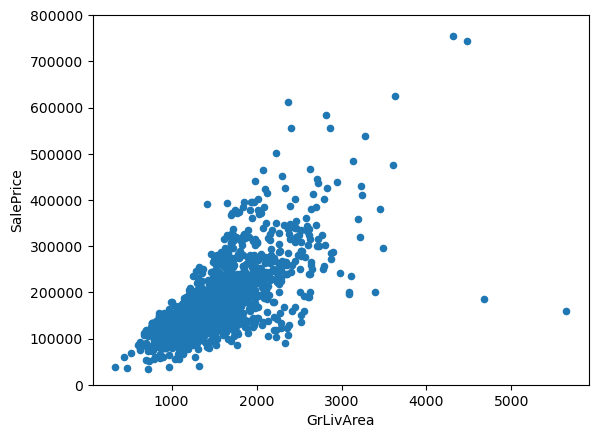

In [14]:
# scatter plot grlivarea vs. SalePrice
var = 'GrLivArea'
data = df_train[['SalePrice',var]]
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))

# linear relationship found in the graph below

<Axes: xlabel='TotalBsmtSF', ylabel='SalePrice'>

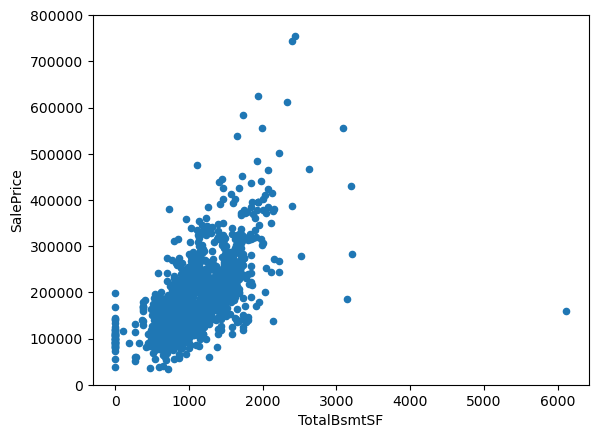

In [16]:
# scatter plot totalbsmtsf/saleprice
var = 'TotalBsmtSF'
data = df_train[['SalePrice',var]]
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))

# quadratic relationship ?

### Categorical Variables

(np.float64(-0.5), np.float64(9.5), np.float64(0.0), np.float64(800000.0))

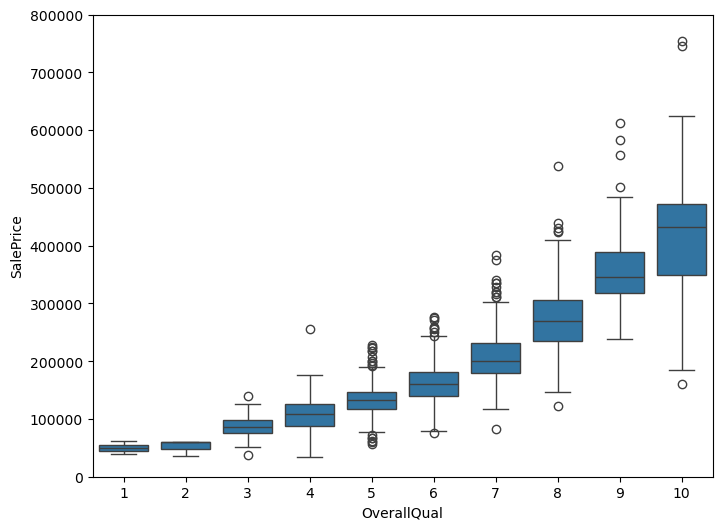

In [17]:
# overallqual
var = 'OverallQual'
data = df_train[['SalePrice',var]]
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000)

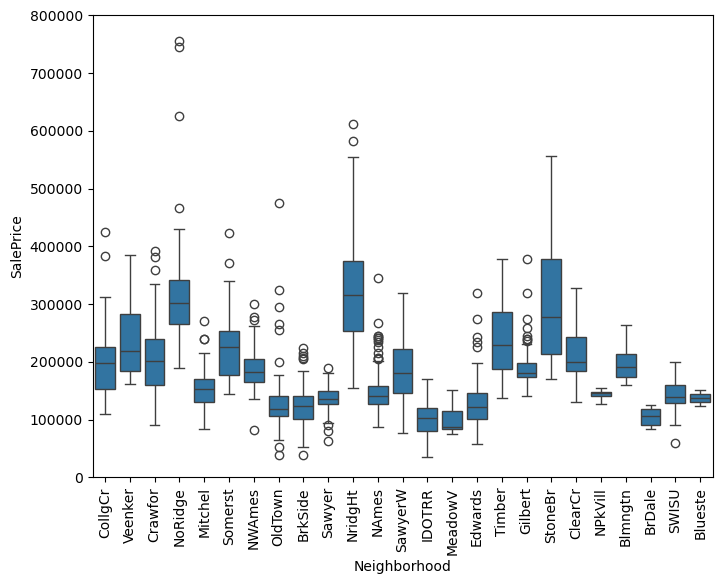

In [18]:
# Neighborhood
var = 'Neighborhood'
data = df_train[['SalePrice', var]]
plt.figure(figsize=(8, 6))
sns.boxplot(x=var, y="SalePrice", data=data)
plt.ylim(0, 800000)
plt.xticks(rotation=90)
plt.show()

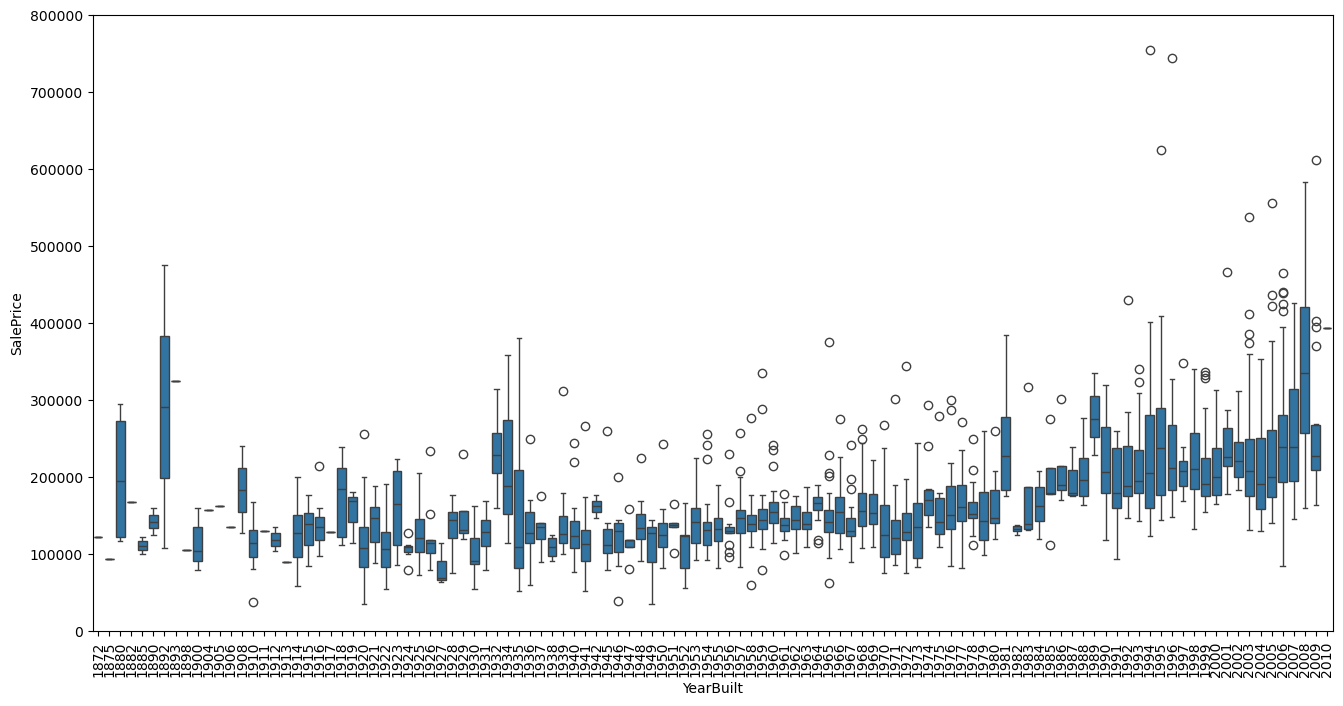

In [19]:
# YearBuilt
var = 'YearBuilt'
data = df_train[['SalePrice', var]]
plt.figure(figsize=(16, 8))
sns.boxplot(x=var, y="SalePrice", data=data)
plt.ylim(0, 800000)
plt.xticks(rotation=90)
plt.show()


## Multivariate Analysis

Let's look at a correlation matrix between numeric attributes:

<Axes: >

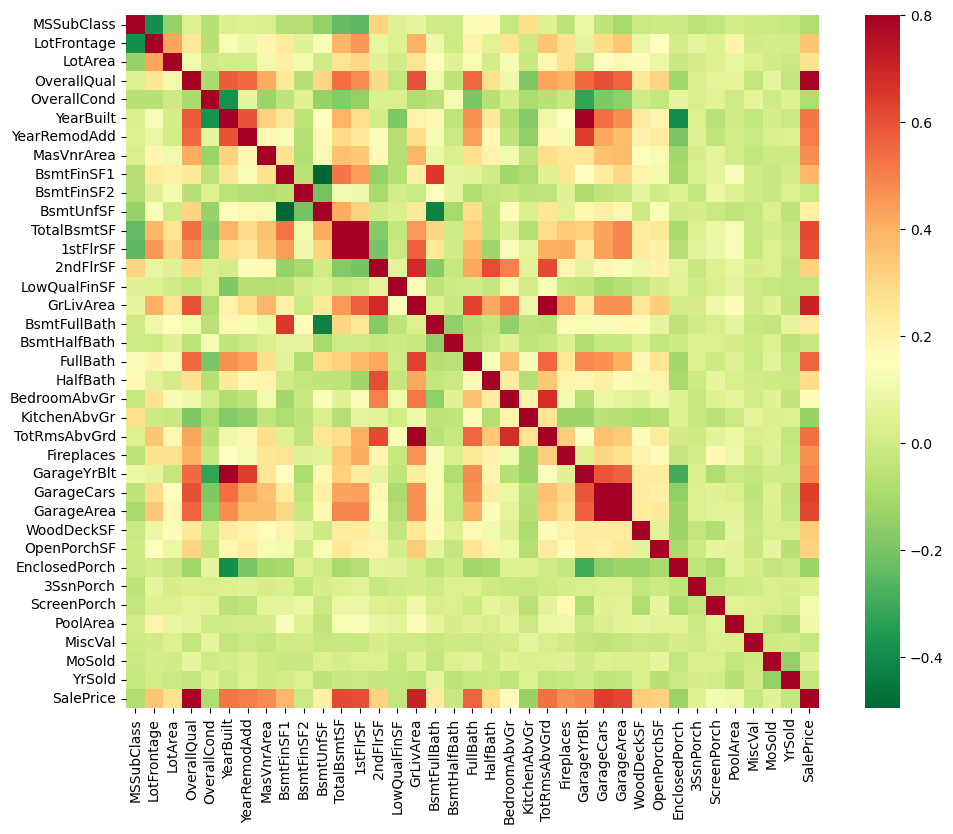

In [23]:
# correlation matrix
corrmat = df_train.corr(numeric_only=True)
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True,cmap="RdYlGn_r")

**These are the variables most correlated with SalePrice. Our thoughts on this:**

- 'OverallQual', 'GrLivArea' and 'TotalBsmtSF' are strongly correlated with 'SalePrice'. Check!
- 'GarageCars' and 'GarageArea' are also among the most strongly correlated variables. 
    - The number of cars that fit into a garage is a consequence of the garage area. 
    - 'GarageCars' and 'GarageArea' are like twin brothers. You'll never be able to distinguish them. 
    - Therefore, we just need one of these variables in our analysis (we can keep 'GarageCars' since its correlation with 'SalePrice' is higher).
- 'TotalBsmtSF' and '1stFloor' also seem to be twin brothers. 
    - We can keep 'TotalBsmtSF' just to be able to say that our first guess was right.
- 'FullBath' 
    - the number of bathrooms in the house could certainly be correlated with sale price.
- 'TotRmsAbvGrd' and 'GrLivArea' – twin brothers again.
- 'YearBuilt': It seems that 'YearBuilt' is slightly correlated with 'SalePrice'. 
    - Therefore, we could also look at the problem as time-series analysis but we will get into that later.

**To make it more readable we can plot only those variables that correlate with the target variable more than 0.5:**

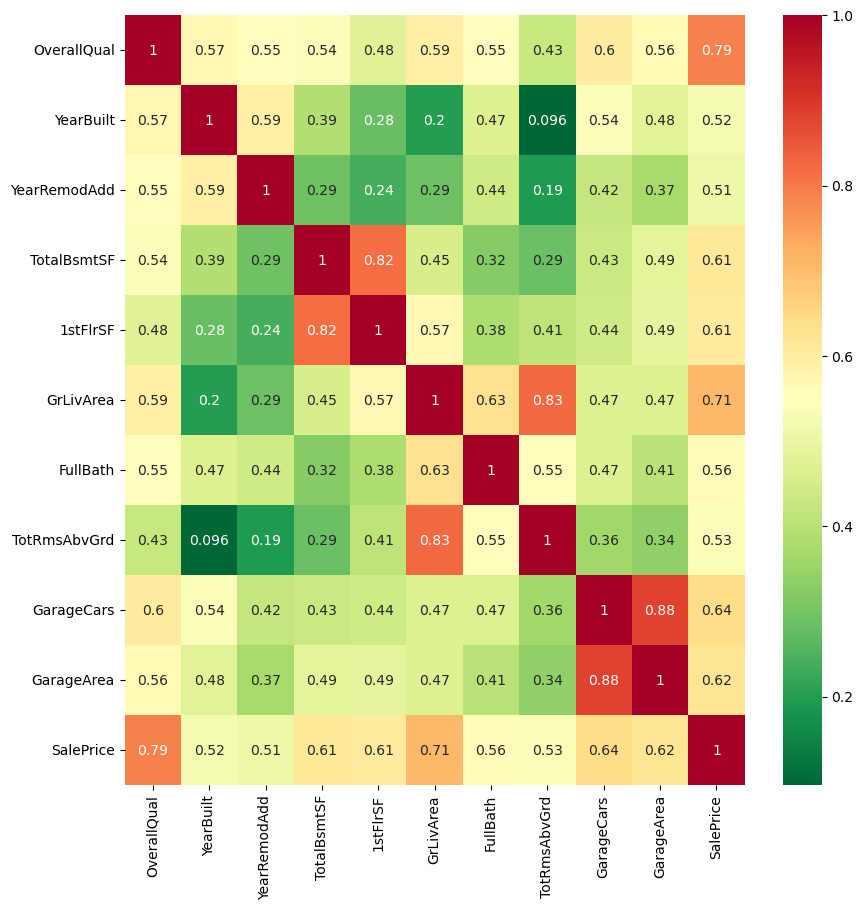

In [21]:
# most correlated features with SalePrice
corrmat = df_train.corr(numeric_only=True)
top_corr_features = corrmat.index[abs(corrmat["SalePrice"])>0.5]
plt.figure(figsize=(10,10))
g = sns.heatmap(df_train[top_corr_features].corr(numeric_only=True),annot=True,cmap="RdYlGn_r")

# Null Value Replacement

Missing data in a data set can reduce the power/fit of a model if treated as a real category, because:

- Some models ignore rows with missing values effectively reducing your sample size.
- It can lead to a wrong prediction or classification.
- Missing values do not always mean an empty field.

check whether we have some columns with missing values.

In [24]:
# missing data
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
MasVnrType,872,0.597260
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479


In [25]:
# There are a couple of columns, where most of the values are missing. We can get rid of these since they don't have any value for us.

# drop 5 columns with the biggest ratio of null values
to_drop = missing_data.head(5).index.tolist()
df_train.drop(to_drop, axis=1, inplace=True)

In [26]:
# extract the names of columns with missing values
cols_with_missing = missing_data[missing_data.Percent > 0].index.tolist()
# remove column names that are already removed from dataset
missing_cols = list(set(cols_with_missing) - set(to_drop))
# check the datatype
df_train.dtypes[missing_cols]

LotFrontage     float64
Electrical       object
GarageFinish     object
GarageQual       object
FireplaceQu      object
BsmtExposure     object
GarageCond       object
BsmtFinType2     object
MasVnrArea      float64
BsmtCond         object
GarageType       object
BsmtFinType1     object
BsmtQual         object
GarageYrBlt     float64
dtype: object

### Address Numeric Variables

Create a separate column to keep the information whether the value was missing. This way, we will have this information available in this column after we replace the value in the original one.

Then work on the Null value replacement.

In [27]:
num_cols_with_missing = df_train.dtypes[missing_cols][df_train.dtypes[missing_cols] == 'float'].index.tolist()
# create new variable with the information that it was missing
for cl in num_cols_with_missing:
    df_train[cl + "_missing_ind"] = 0
    df_train.loc[df_train[cl].isnull(), cl + "_missing_ind"] = 1

In [28]:
df_train["LotFrontage"] = df_train["LotFrontage"].fillna(df_train["LotFrontage"].mean())
df_train["GarageYrBlt"] = df_train["GarageYrBlt"].fillna(df_train["GarageYrBlt"].min())
df_train["MasVnrArea"] = df_train["MasVnrArea"].fillna(0)

LotFrontage – We replace the missing values with the mean.

GarageYrBlt – If the house has a garage and the year is missing, we assume it's the same year the house was built.

MasVnrArea – If the veneer area is missing, we assume it's 0.


### Addressing Object (String) Variables

Find the variables with the dtype == "object" and having at least one missing value.

In [29]:
# categorical variables:

df_train.dtypes[missing_cols][df_train.dtypes[missing_cols] == 'object']
cat_cols_with_missing = df_train.dtypes[missing_cols][df_train.dtypes[missing_cols] == 'object'].index.tolist()

With the help of the data documentation we have, we can figure out that the missing values in Garage, Fireplace and Basement variables mean no garage, no fireplace and no basement respectively. 
Therefore, we will replace the missing values with "None".

In [30]:
# GarageFinish : data description says NA means "no garage"
df_train["GarageFinish"] = df_train["GarageFinish"].fillna("None")
# GarageCond : data description says NA means "no garage"
df_train["GarageCond"] = df_train["GarageCond"].fillna("None")
# GarageQual : data description says NA means "no garage"
df_train["GarageQual"] = df_train["GarageQual"].fillna("None")
# GarageType : data description says NA means "no garage"
df_train["GarageType"] = df_train["GarageType"].fillna("None")

# FireplaceQu: data description says NA means "no fireplace"
df_train["FireplaceQu"] = df_train["FireplaceQu"].fillna("None")

# BsmtExposure : data description says NA means "no basement"
df_train["BsmtExposure"] = df_train["BsmtExposure"].fillna("None")
# BsmtFinType2 : data description says NA means "no basement"
df_train["BsmtFinType2"] = df_train["BsmtFinType2"].fillna("None")
# BsmtFinType1 : data description says NA means "no basement"
df_train["BsmtFinType1"] = df_train["BsmtFinType1"].fillna("None")
# BsmtCond : data description says NA means "no basement"
df_train["BsmtCond"] = df_train["BsmtCond"].fillna("None")
# BsmtQual : data description says NA means "no basement"
df_train["BsmtQual"] = df_train["BsmtQual"].fillna("None")

The information about Electrical is missing in the documentation. 

Since we are dealing with a categorical variable, we will create a new category for a missing value.

In [47]:
df_train["Electrical"] = df_train["Electrical"].fillna("Empty")

df_train["MasVnrArea"]

0       196.0
1         0.0
2       162.0
3         0.0
4       350.0
        ...  
1455      0.0
1456    119.0
1457      0.0
1458      0.0
1459      0.0
Name: MasVnrArea, Length: 1460, dtype: float64

Run another filling_values check to see if we have filled in all the data

In [32]:
# missing data
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
MSSubClass,0,0.0
KitchenAbvGr,0,0.0
GarageYrBlt,0,0.0
GarageType,0,0.0
FireplaceQu,0,0.0
Fireplaces,0,0.0
Functional,0,0.0
TotRmsAbvGrd,0,0.0
KitchenQual,0,0.0
BedroomAbvGr,0,0.0


# Outlier Detection

Let's check the values of our target variable together with the other numeric attributes we identified as important:

TotalBsmtSF
GrLivArea

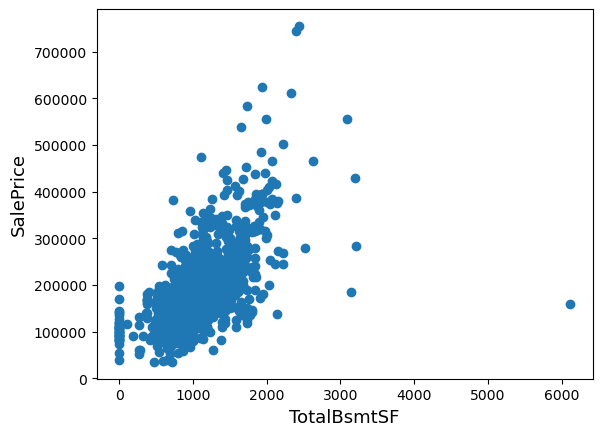

In [48]:
fig, ax = plt.subplots()
ax.scatter(x = df_train['TotalBsmtSF'], y = df_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('TotalBsmtSF', fontsize=13)
plt.show()


We can see that there is one house with a really huge basement and but a cheap price. This house would cause problems in modelling because, except for this one house, we can see a clear linear relationship between the size of a basement and the price of a house.

Now we are going to remove this outlier from our dataset. We will remove all observations that have more than 5,000 square feet of basement and a price lower than $300,000:

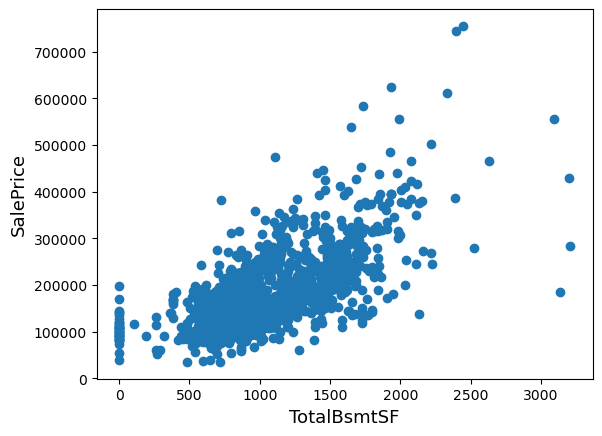

In [49]:
# delete outliers
df_train = df_train.drop(df_train[(df_train['TotalBsmtSF']>5000) & (df_train['SalePrice']<300000)].index)

# reset index
df_train = df_train.reset_index(drop=True)

# check the graphic again
fig, ax = plt.subplots()
ax.scatter(df_train['TotalBsmtSF'], df_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('TotalBsmtSF', fontsize=13)
plt.show()

Let's check another numeric variable: 

GrLivArea.

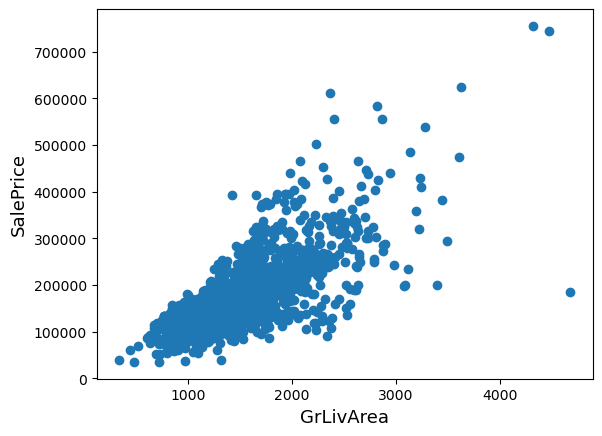

In [50]:
fig, ax = plt.subplots()
ax.scatter(x = df_train['GrLivArea'], y = df_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

This is a good example of multivariate outliers. If we look only at GrLivArea there are no outliers because the largest area is quite close to the second and the third largest. However, if we take a look at SalePrice together with GrLivArea, we can see that the price of the largest house is really small, which will again cause problems in the modelling step. Therefore we should remove this observation as well:



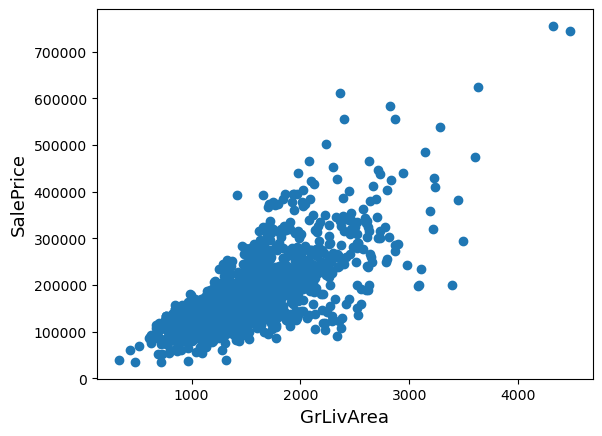

In [51]:
df_train = df_train.drop(df_train[(df_train['GrLivArea']>4000) & (df_train['SalePrice']<300000)].index)
df_train = df_train.reset_index(drop=True)

fig, ax = plt.subplots()
ax.scatter(df_train['GrLivArea'], df_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

# Data Visualisations / Exploration

## Matplotlib

In [2]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0,10,20) #Generge 20 datapoints between 0 and 10
y = x**2

In [ ]:
%matplotlib inline

# Or

plt.show() #to display your plots when not using Jupyter Notebooks

#### Functional Approach (or stateful)

Using the basic Matplotlib commands

Matplotlib Functions
- plt.plot(x,y)

- plt.title(‘ ‘)

- plt.xlabel(‘ ‘)

- plt.ylabel(‘ ‘)

- plt.subplot(num_rows, num_columns, plot_number)
    - nrows: the number of rows the Figure should have.
    - ncols: the number of columns the Figure should have.
    - plot_number : which refers to a specific plot in the Figure.

- plt.subplot(x, y, ‘red’)

- plt.subplot(y, x, ‘green’)

- plt.figure()
    - figsize=(0,0)
    - dpi=(100)


Text(0, 0.5, 'Y-Label')

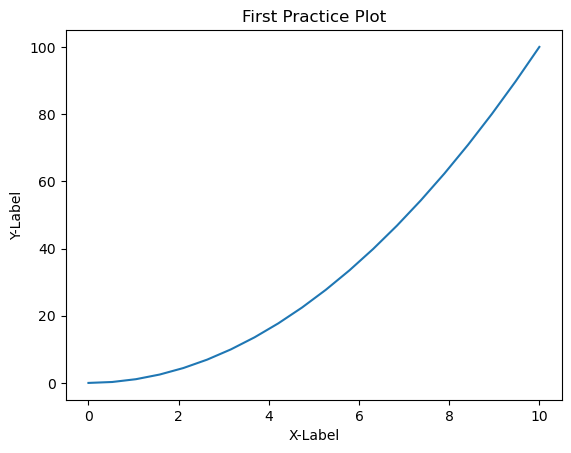

In [5]:
plt.plot(x,y)
plt.title('First Practice Plot')
plt.xlabel('X-Label')
plt.ylabel('Y-Label')

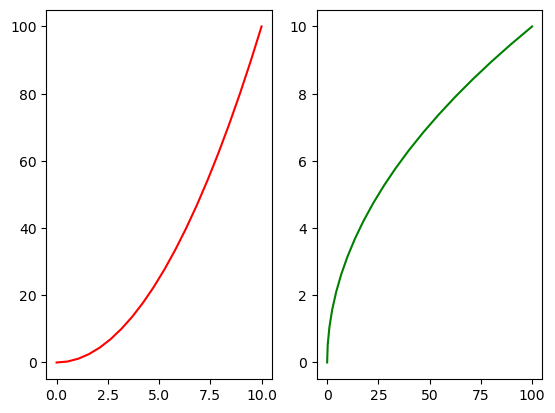

In [8]:
#- plt.subplot(num_rows, num_columns, plot_number)
    # - nrows: the number of rows the Figure should have.
    # - ncols: the number of columns the Figure should have.
    # - plot_number : which refers to a specific plot in the Figure.

plt.subplot(1, 2, 1)
plt.plot(x,y,'red')

plt.subplot(1, 2, 2)
plt.plot(y, x, 'green')

#### Object-Oriented Approach (or stateless)

The idea here is to create **Figure objects** and call methods off it. 

Let’s create a blank Figure using the **.figure() method.**

Matplotlib Function

- plt.figure()

- add_axes()

Text(0.5, 1.0, 'Object-Orientated Approach Plot Title')

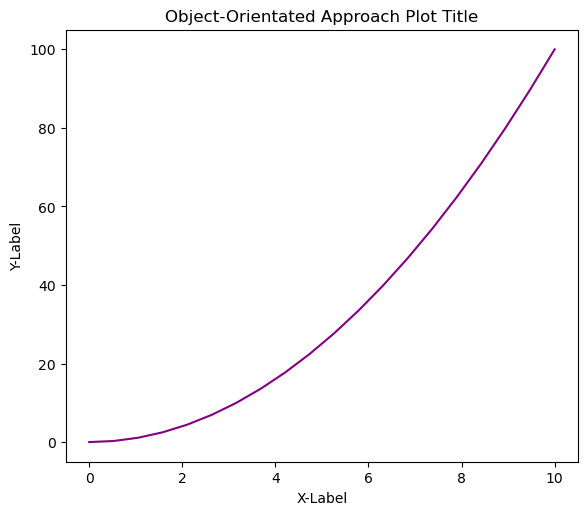

In [13]:
fig = plt.figure()
ax = fig.add_axes([0.1,0.2,0.8,0.9])

ax.plot(x, y, 'purple')
ax.set_xlabel('X-Label')
ax.set_ylabel('Y-Label')
ax.set_title('Object-Orientated Approach Plot Title')


Remember, we noted that a Figure can contain multiple figures. Let’s try to put in two sets of figures on one canvas:

Text(0, 0.5, 'axes2 y-label')

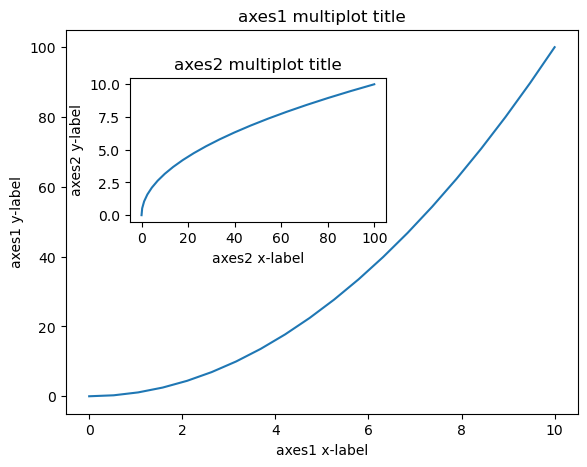

In [18]:
fig = plt.figure()

axes1 = fig.add_axes([0.1,0.1,0.8,0.8])
axes2 = fig.add_axes([0.2,0.5,0.4,0.3])

axes1.plot(x,y)
axes1.set_title('axes1 multiplot title')
axes1.set_xlabel('axes1 x-label')
axes1.set_ylabel('axes1 y-label')


axes2.plot(y,x)
axes2.set_title('axes2 multiplot title')
axes2.set_xlabel('axes2 x-label')
axes2.set_ylabel('axes2 y-label')

**Multiple Plots in grid formats**

The only difference between plt.figure() and plt.subplots() is that plt.subplots() automatically does what the .add_axes() method of .figure() will do for you based off the number of rows and columns you specify.



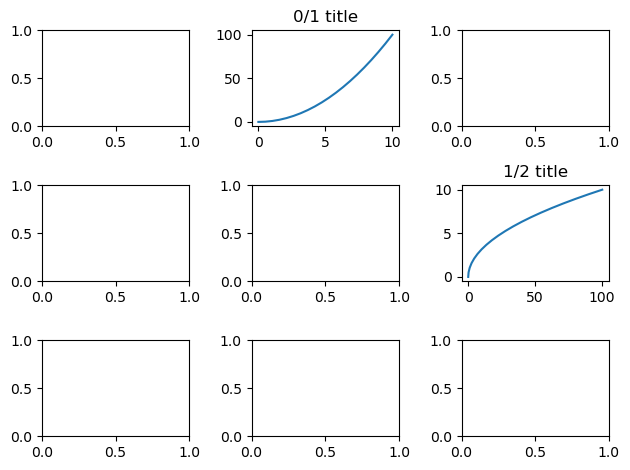

In [24]:
fig, ax = plt.subplots(nrows=3, ncols=3)

ax[0,1].plot(x,y)
ax[0,1].set_title('0/1 title')


ax[1,2].plot(y,x)
ax[1,2].set_title('1/2 title')

plt.tight_layout()

#### Save A Figure (Plot)

Using the .savefig() method, you can save the above figure in a file/

fig.savefig(‘my_figure.png’)

In [26]:
fig.savefig("my_figure.png")

#### Plot Apperance & Customisation

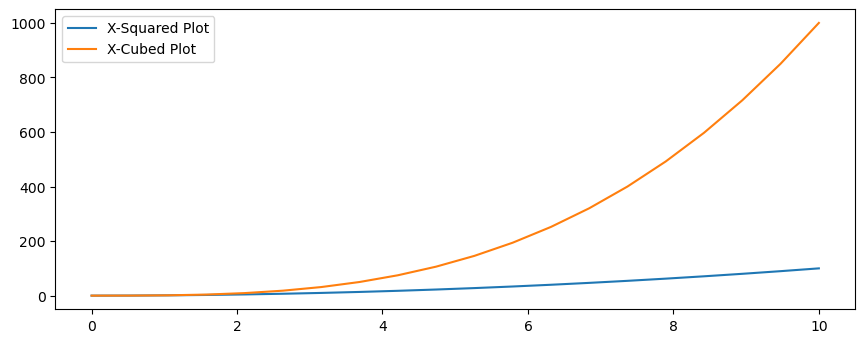

In [30]:
fig = plt.figure(figsize=(8,3), dpi=100)
ax = fig.add_axes([0,0,1,1])
ax.plot(x,x**2, label="X-Squared Plot")
ax.plot(x,x**3, label="X-Cubed Plot")
ax.legend()

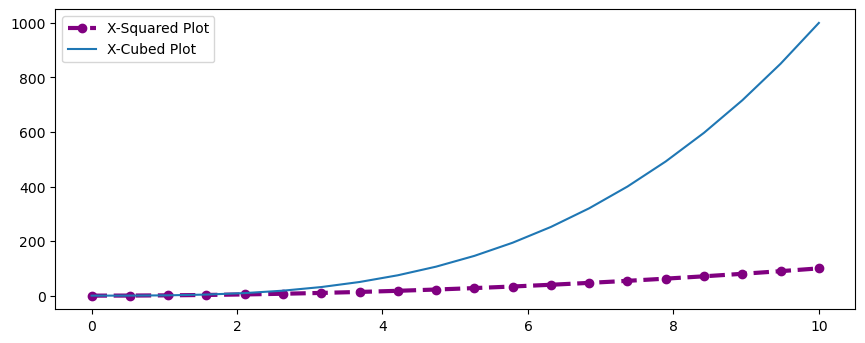

In [37]:
fig = plt.figure(figsize=(8,3), dpi=100)
ax = fig.add_axes([0,0,1,1])
ax.plot(x,x**2, linewidth=3, linestyle='--', marker='o', markersize=6,label="X-Squared Plot", color="purple")
ax.plot(x,x**3, label="X-Cubed Plot")
ax.legend()

Plot Range

Choose limitations for X and Y axes ranges to tell specific storyies

(0.0, 5.0)

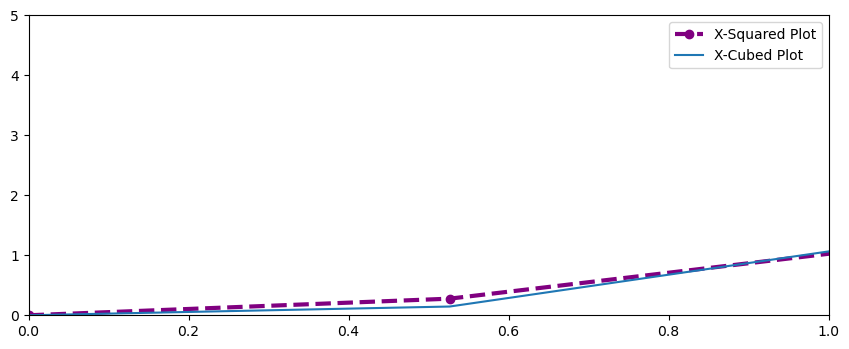

In [39]:
fig = plt.figure(figsize=(8,3), dpi=100)
ax = fig.add_axes([0,0,1,1])
ax.plot(x,x**2, linewidth=3, linestyle='--', marker='o', markersize=6,label="X-Squared Plot", color="purple")
ax.plot(x,x**3, label="X-Cubed Plot")
ax.legend()

ax.set_xlim([0,1])
ax.set_ylim([0,5])

## Types Of Matplotlib Graphs

### Line Plot

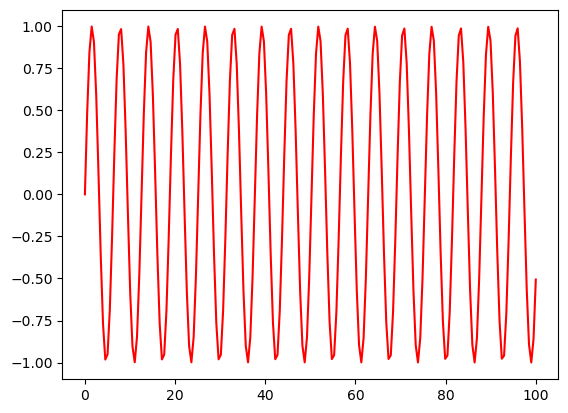

In [40]:
# 200 values from the interval <0,100>, equidistantly divided
x = np.linspace(0,100,200)
y = np.sin(x)

# a line plot
plt.plot(x,y,'red')
plt.show()

### Scatterplot

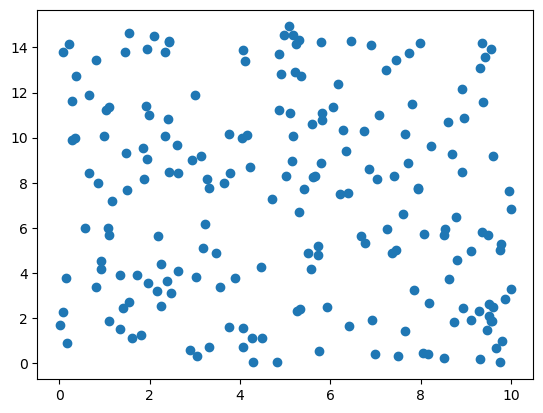

In [41]:
# 200 random values from the interval <0,10>
x = 10*np.random.rand(200,1)

# 200 random values from the interval <0,15>
y = 15*np.random.rand(200,1)

# a scatter plot 
plt.scatter(x,y)
plt.show()

### Histogram

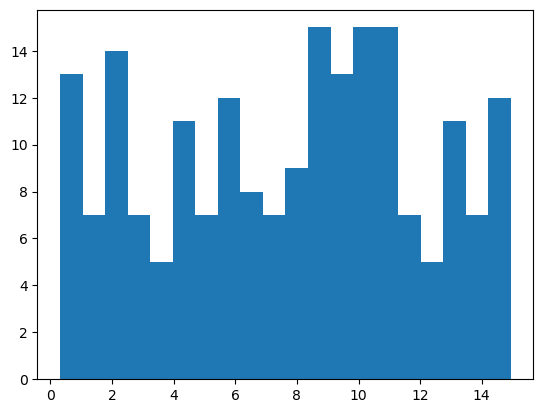

In [42]:
# 200 random values from the interval <0,15>
y = 15*np.random.rand(200,1)

# a histogram with 20 bins
plt.hist(y,bins=20)
plt.show()

### Graphs on Common Axes

plot two mathematical functions (sin(x), sin(x)*cos(x)) on one figure with shared axis.

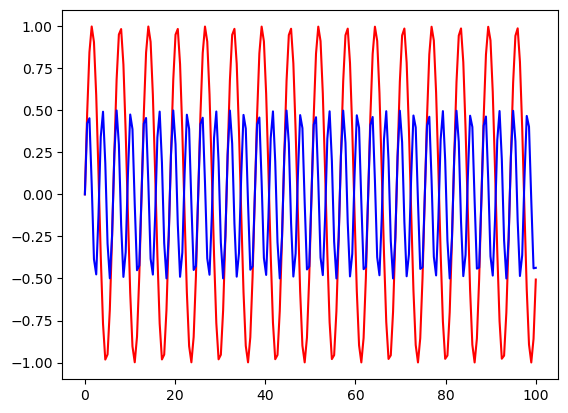

In [43]:
# 200 values from the interval <0,100>, equidistantly divided
x = np.linspace(0,100,200)

# sin(x) values
y1 = np.sin(x)

# sin(x)*cos(x) values
y2 =(np.sin(x))*(np.cos(x))

# a line plot of sin(x), red line
plt.plot(x,y1,'red')

# a line plot of sin(x)*cos(x), blue line
plt.plot(x,y2,'blue')
plt.show()

### Subplots

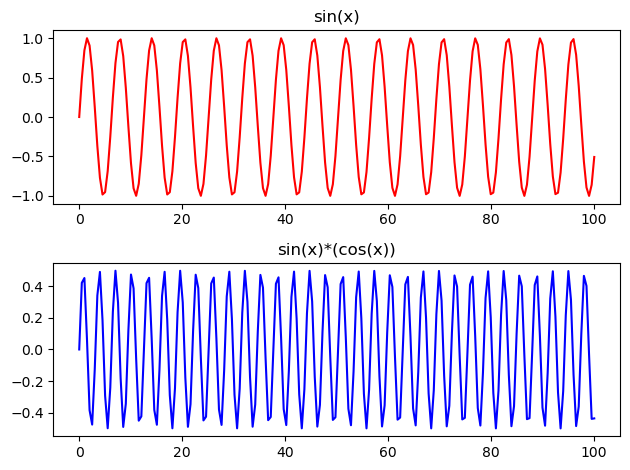

In [44]:
# the first figure
plt.subplot(2,1,1)
plt.plot(x,y1,'red')
plt.title('sin(x)')

# the second figure
plt.subplot(2,1,2)
plt.plot(x,y2,'blue')
plt.title('sin(x)*(cos(x))')

# automatically adjust the subplot parameters to give a specified padding
plt.tight_layout()
plt.show()

### Legends

famous Iris dataset. For this purpose, we have to import Pandas and Sklearn libraries.

In [45]:
import pandas as pd

from sklearn import datasets

In [48]:
# load iris dataset
iris = datasets.load_iris()

# create dataframe
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

# create target
iris_df['target'] = iris.target

# map the target values to the target names
iris_df['target_name'] =iris_df.target.map(
    {0: 'setosa', 
     1: 'versicolor',
     2: 'virginica'
     })


iris_df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


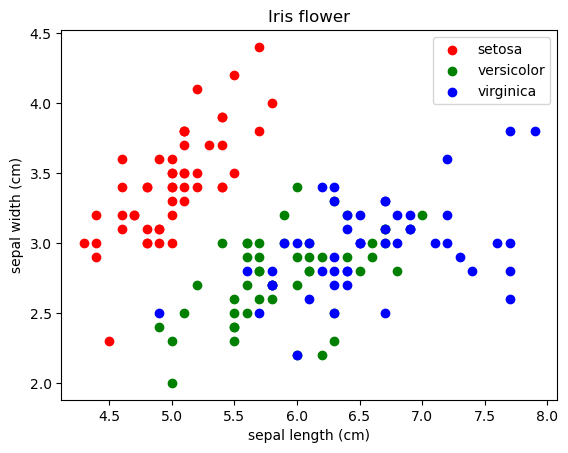

In [49]:
#Now plot a scatter plot of sepal length and sepal width for each type of the Iris flower.

# Iris setosa
setosa = iris_df[iris_df.target_name == 'setosa']

# Iris versicolor
versicolor = iris_df[iris_df.target_name == 'versicolor']

# Iris virginica
virginica = iris_df[iris_df.target_name == 'virginica']

# plot setosa
plt.scatter(setosa['sepal length (cm)'], setosa['sepal width (cm)'],
            marker ='o', color = 'red', label = 'setosa')

# plot versicolor
plt.scatter(versicolor['sepal length (cm)'], versicolor['sepal width (cm)'],
            marker ='o', color = 'green', label = 'versicolor')

# plot virginica
plt.scatter(virginica['sepal length (cm)'], virginica['sepal width (cm)'],
            marker ='o', color = 'blue', label = 'virginica')

# legend location
plt.legend(loc='upper right')

# plot title
plt.title('Iris flower')

# x-axis title
plt.xlabel('sepal length (cm)')

# y-axis title
plt.ylabel('sepal width (cm)')
plt.show()

## Annotations

**To add annotations we used the plt.annotate() function.**

The xy parameter is a tuple containing the position to which the arrow is pointing. The xytext is a tuple containing the position where the text of the annotation is placed.

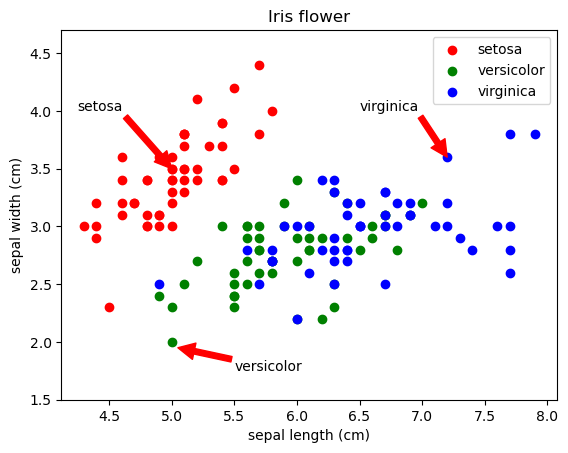

In [50]:
# the same code as before
plt.scatter(setosa['sepal length (cm)'],setosa['sepal width (cm)'],
            marker ='o', color = 'red', label = 'setosa')

plt.scatter(versicolor['sepal length (cm)'],versicolor['sepal width (cm)'],
            marker ='o', color = 'green', label = 'versicolor')

plt.scatter(virginica['sepal length (cm)'],virginica['sepal width (cm)'],
            marker ='o', color = 'blue', label = 'virginica')

# new lines of code
# it can be tricky to find the right coordinates for the first time
######################
plt.annotate('setosa', xy =(5.0,3.5),
             xytext = (4.25,4.0), arrowprops={'color':'red'})
plt.annotate('virginica', xy =(7.2,3.6),
             xytext = (6.5,4.0), arrowprops={'color':'red'})
plt.annotate('versicolor', xy =(5.05,1.95),
             xytext = (5.5,1.75), arrowprops={'color':'red'})
######################

# the same code as before
plt.legend(loc='upper right')
plt.title('Iris flower')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.ylim(1.5,4.7)
plt.show()

## Seaborn

A very proficient visualisation library based on Matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics. Often use for scientific articles


Below is an example plot for annotating and discussions

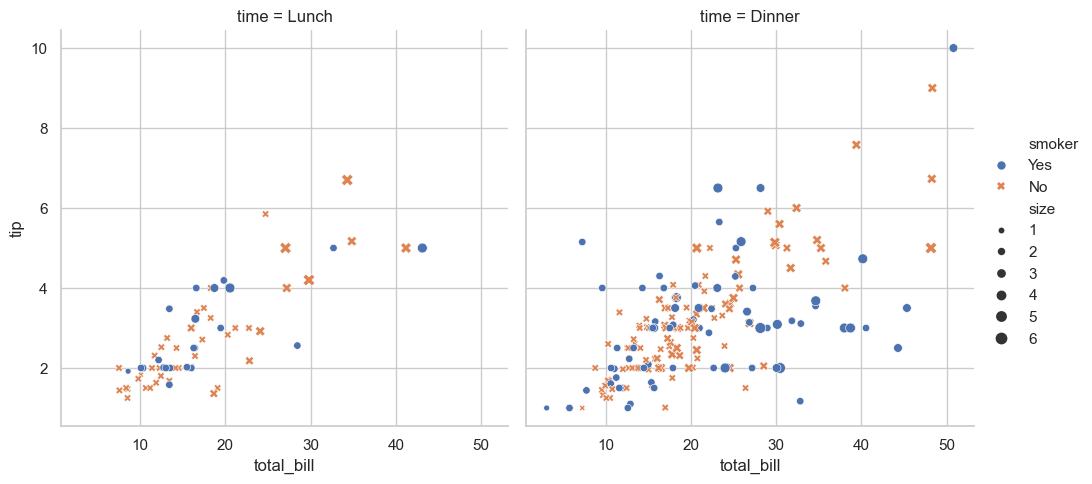

In [67]:
# Import seaborn
import seaborn as sns

# Apply the default theme
sns.set_theme()

# Apply a style if desired
# sns.set_style('whitegrid')

# Load an example dataset
tips = sns.load_dataset("tips")

# Create a visualization
sns.relplot(
    data=tips,
    x="total_bill", y="tip", col="time",
    hue="smoker", style="smoker", size="size",
)

There are five preset seaborn themes: 

- darkgrid (default theme)
- whitegrid
- dark
- white
- ticks

They are each suited to different applications and personal preferences. 

The function relplot() is named that way because it is designed to visualize many different statistical relationships. 

While scatter plots are often effective, relationships where one variable represents a measure of time are better represented by a line. 
The relplot() function has a convenient kind parameter that lets you easily switch to this alternate representation:



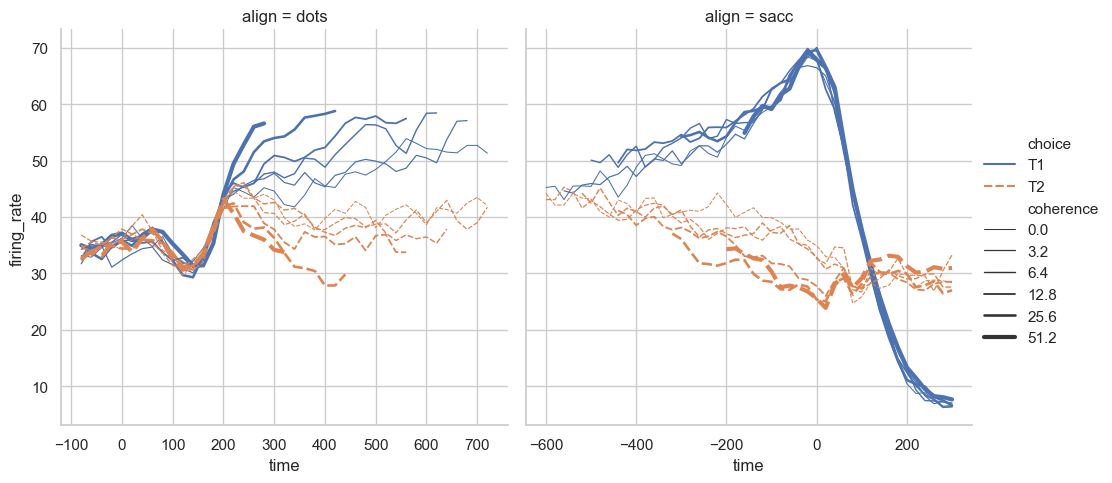

In [68]:
dots = sns.load_dataset("dots")
sns.relplot(
    data=dots, kind="line",
    x="time", y="firing_rate", col="align",
    hue="choice", size="coherence", style="choice",
    facet_kws=dict(sharex=False),
)

Notice how the size and style parameters are used in both the scatter and line plots, but they affect the two visualizations differently: changing the marker area and symbol in the scatter plot vs the line width and dashing in the line plot.

### Statistical estimation

Often, we are interested in the average value of one variable as a function of other variables. Many seaborn functions will automatically perform the statistical estimation that is necessary to answer these questions:



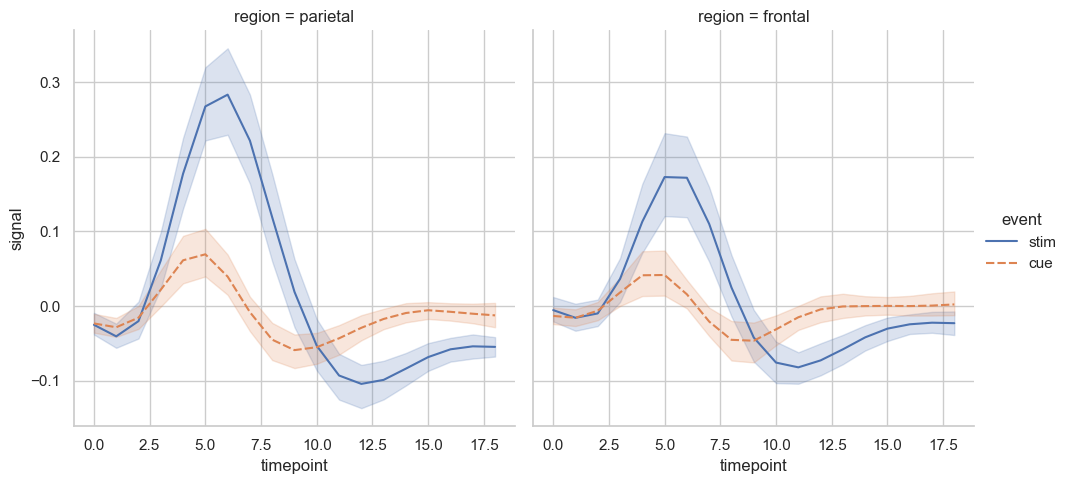

In [69]:
fmri = sns.load_dataset("fmri")
sns.relplot(
    data=fmri, kind="line",
    x="timepoint", y="signal", col="region",
    hue="event", style="event",
)

When statistical values are estimated, seaborn will use bootstrapping to compute confidence intervals and draw error bars representing the uncertainty of the estimate.

Statistical estimation in seaborn goes beyond descriptive statistics. 
For example, it is possible to enhance a scatterplot by including a **linear regression model (and its uncertainty) using lmplot():**


## Regression Models

- lmplot()
    - A higher-level function built on top of FacetGrid — allows multiple regression plots grouped by a column (e.g. different Pokémon types).
    - You want to compare regression lines across categories (e.g. Type 1: Grass vs Fire vs Water).
        - Returns a FacetGrid object.
        - Supports faceting with col, row, and hue.
        - Less customizable with matplotlib, but more powerful for grouped visuals.

- regplot()
    - A low-level function used to plot a single regression line (one pair of x and y)
    - Ideal for quick plots of simple regression.


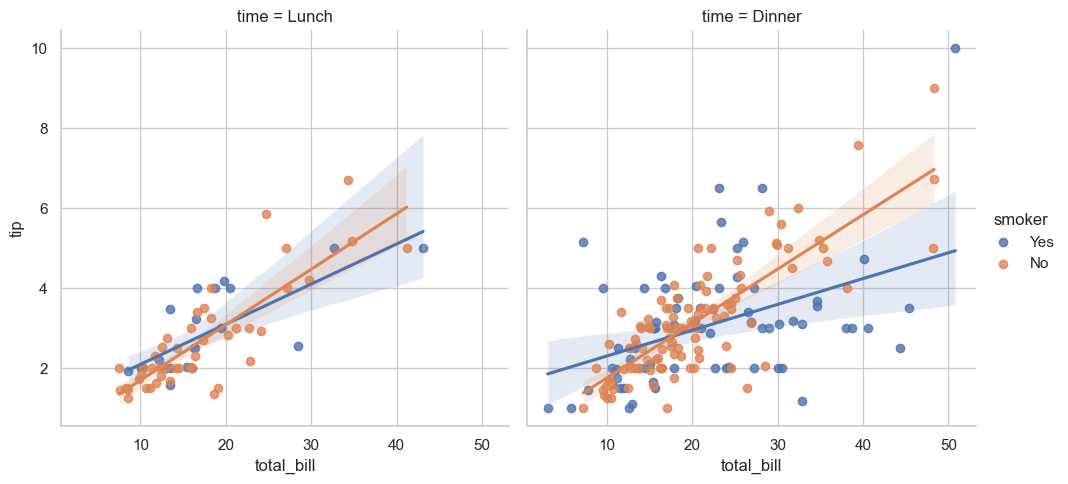

In [70]:
sns.lmplot(data=tips, x="total_bill", y="tip", col="time", hue="smoker")

### Distributional representations

Statistical analyses require knowledge about the distribution of variables in your dataset. The seaborn function displot() supports several approaches to visualizing distributions. These include classic techniques like histograms and computationally-intensive approaches like kernel density estimation:

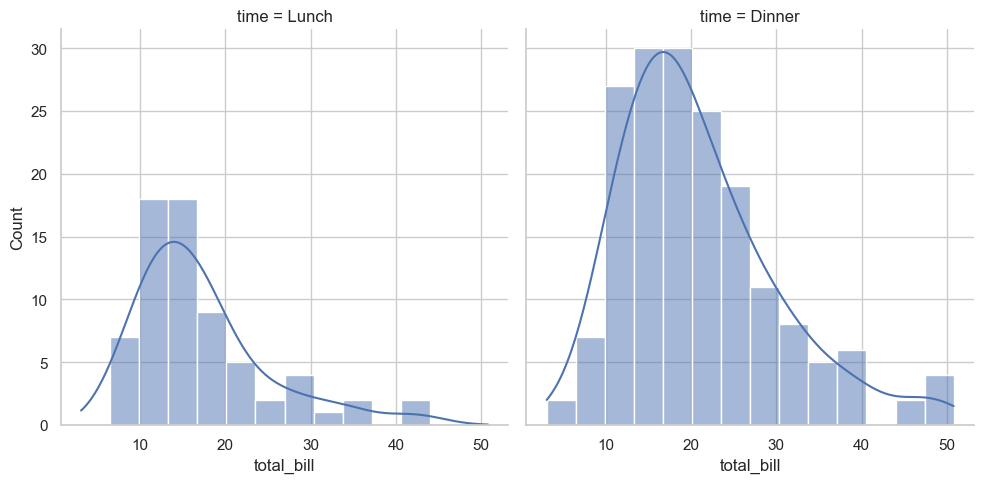

In [71]:
sns.displot(data=tips, x="total_bill", col="time", kde=True)

Seaborn also tries to promote techniques that are powerful but less familiar.

Such as;

- Calculating and plotting the empirical cumulative distribution function of the data:

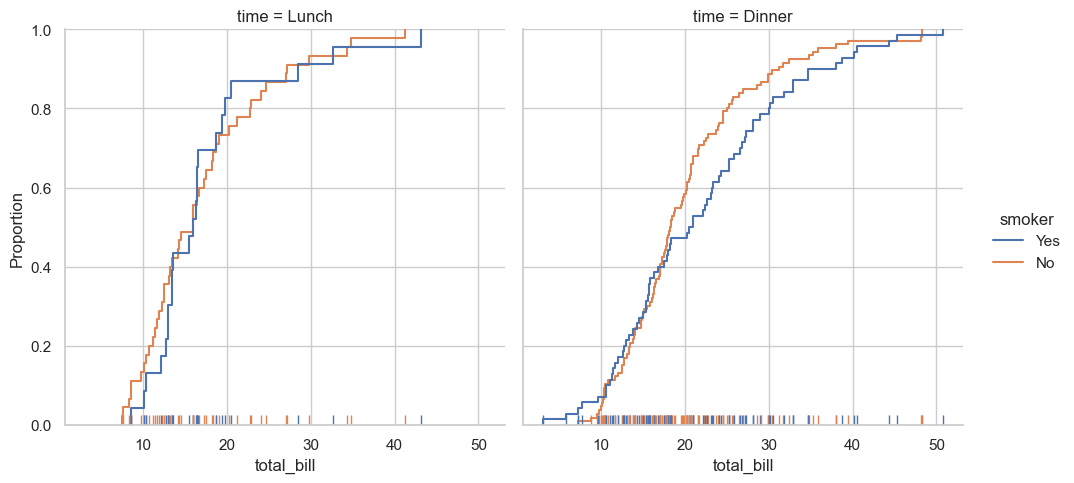

In [72]:
sns.displot(data=tips, kind="ecdf", x="total_bill", col="time", hue="smoker", rug=True)

### Plots for categorical data

specialized plot types in seaborn are oriented towards visualizing categorical data.
Can be produced with

- catplot()

Opportunity to choose level of granularity, such as a 'swarm plot'. A Scatterplot that adjusts the position of points along the categorical axis to view all available points

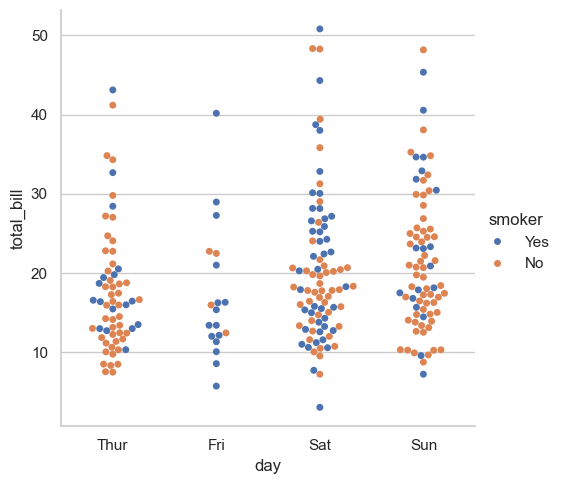

In [73]:
sns.catplot(data=tips, kind="swarm", x="day", y="total_bill", hue="smoker")

Or you could use **kernel density estimation** to represent the underlying distribution that the points are sampled from:

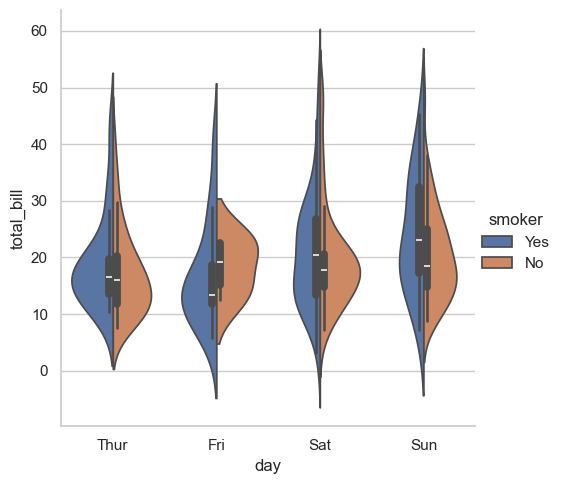

In [74]:
sns.catplot(data=tips, kind="violin", x="day", y="total_bill", hue="smoker", split=True)

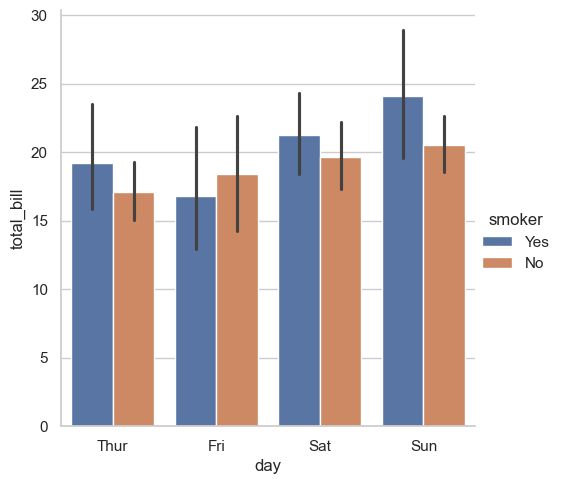

In [76]:
# Or you could show only the mean value and its confidence interval within each nested category:

sns.catplot(data=tips, kind="bar", x="day", y="total_bill", hue="smoker")

## Multivariate views on complex datasets


Some seaborn functions combine multiple kinds of plots to quickly give informative summaries of a dataset. 

- jointplot()
    - Focuses on a single relationship. 
    - It plots the joint distribution between two variables along with each variable’s marginal distribution:

- pairplot()
    - A broader view
    - Shows joint and marginal distributions for all pairwise relationships and for each variable, respectively:

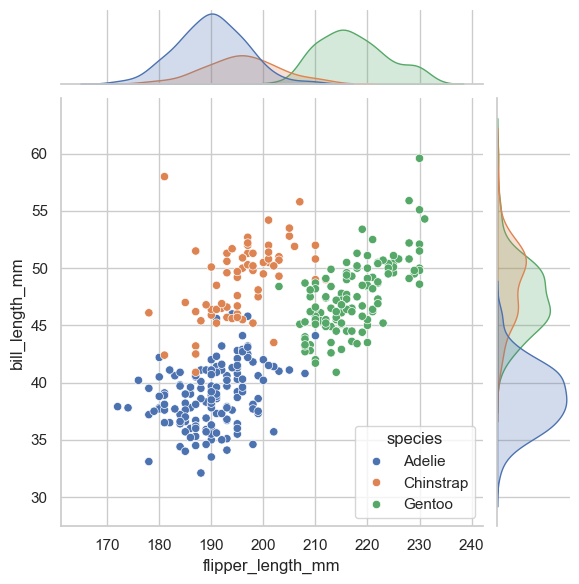

In [77]:
penguins = sns.load_dataset("penguins")
sns.jointplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="species")

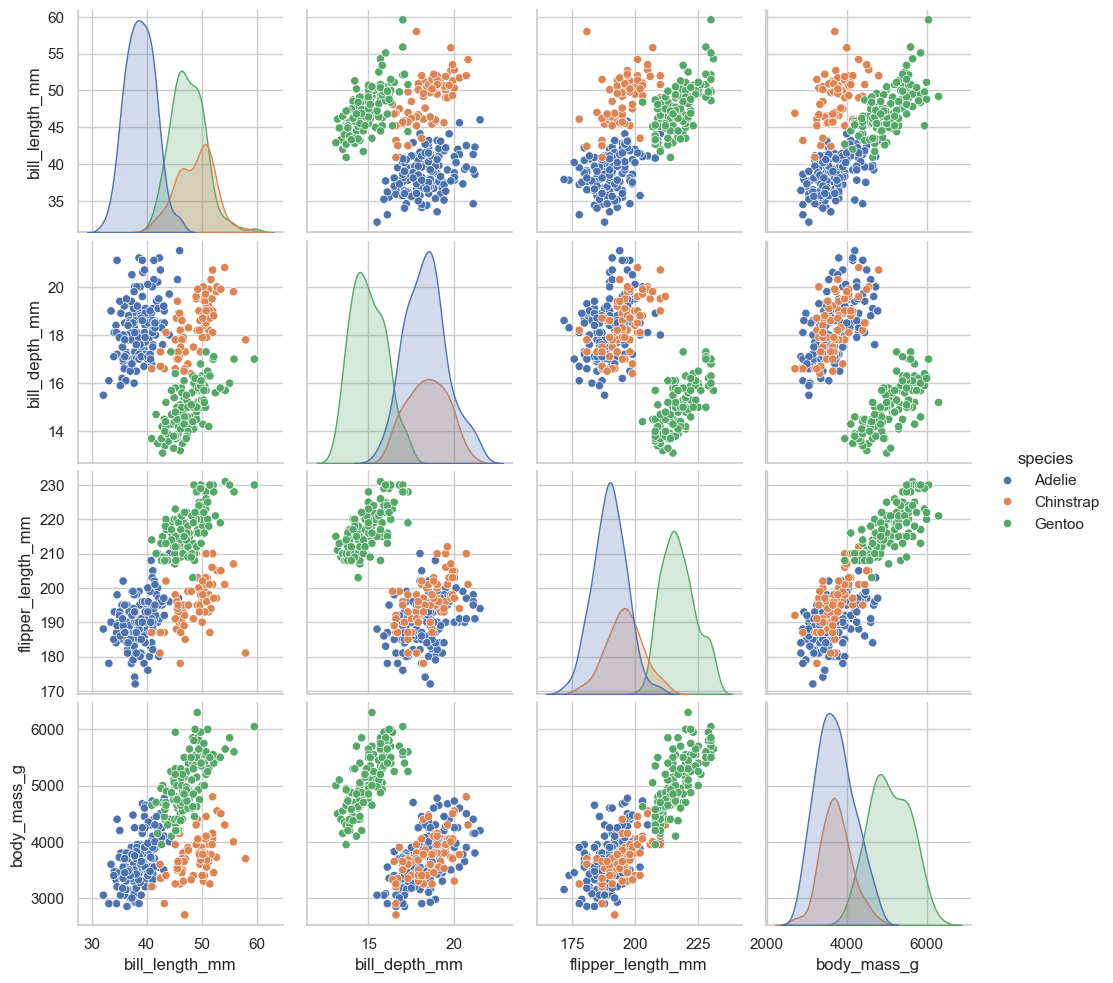

In [78]:
sns.pairplot(data=penguins, hue="species")

## Plotly

- A visualisation library for interactive displays. Using common plots such as scatter plots, line plots, bar charts, and histograms.
- Use Case
    - For dashboards and presentations
    - Closet Python visualisation library to tableau


In [79]:
# import graph objects from plotly 
import plotly.graph_objs as go

### Scatter Plot

In [80]:
# 100 random integers from <1,100>
random_x = np.random.randint(1,101,100)
random_y = np.random.randint(1,101,100)

# create the data
data = [go.Scatter(
    x = random_x,
    y = random_y,
    mode = 'markers',
)]

# create the layout 
layout = go.Layout(
    title = 'Random Data Scatterplot', # Graph title
    xaxis = dict(title = 'Some random x-values'), # x-axis label
    yaxis = dict(title = 'Some random y-values'), # y-axis label
    hovermode ='closest' # handles multiple points landing on the same vertical
)

# create the figure
fig = go.Figure(data=data, layout=layout)
fig.show()

In the example above, we can see that the figure is made up of two components. 

- The first component is a list with traces (only one trace in our case). 
- The second component is a layout that includes all customizations of the figure such as the title, the axis names, and so on. If we don't want to customize our figure, this component is not compulsory.

### Line Plot

In [81]:
# 1000 values from the interval <0,1>, equidistantly divided
x_values = np.linspace(0, 1, 100)

# 100 sample from a standard normal distribution
y_values = np.random.randn(100)   

# create traces
trace0 = go.Scatter(
    x = x_values,
    y = y_values+5,
    mode = 'markers',
    name = 'markers'
)
trace1 = go.Scatter(
    x = x_values,
    y = y_values,
    mode = 'lines+markers',
    name = 'lines+markers'
)
trace2 = go.Scatter(
    x = x_values,
    y = y_values-5,
    mode = 'lines',
    name = 'lines'
)

# create the data
data = [trace0, trace1, trace2]  # assign traces to data

# create the layout
layout = go.Layout(
    title = 'Line chart showing three different modes'
)

# crate the fig
fig = go.Figure(data=data,layout=layout)
fig.show()

In the example above, we created three traces from generated data. 

- In the first trace, data are shifted up along the y-axis by 5. 
- In the second trace, data are without change.
- The third trace, data are shifted down along the y-axis by 5.

 We also set a different marking mode for each trace.


 ### Bar Chart

 Load different data

In [91]:
# load the Olympic data
df_olympic = pd.read_csv('https://raw.githubusercontent.com/Pierian-Data/Plotly-Dashboards-with-Dash/master/Data/2018WinterOlympics.csv',sep =',')

df_olympic.head()
# ranked by golds

,Rank,NOC,Gold,Silver,Bronze,Total
0,1,Norway,14,14,11,39
1,2,Germany,14,10,7,31
2,3,Canada,11,8,10,29
3,4,United States,9,8,6,23
4,5,Netherlands,8,6,6,20


In [90]:
# create the data
data = [go.Bar(
    x=df_olympic['NOC'],  # NOC stands for the National Olympic Committee
    y=df_olympic['Total']
)]

# create the layout
layout = go.Layout(
    title='2018 Winter Olympic Medals by Country'
)

# create the figure
fig = go.Figure(data=data, layout=layout)
fig.show()

In [92]:
# In the chart above, we have the total number of medals for each country. We can also plot how many gold, silver and bronze medals each country had.


# trace1 - gold medals
trace1 = go.Bar(
    x=df_olympic['NOC'],  # NOC stands for the National Olympic Committee
    y=df_olympic['Gold'],
    name = 'Gold',
    marker=dict(color='#FFD700') # set the marker color to gold
)

# trace2 - silver medals
trace2 = go.Bar(
    x=df_olympic['NOC'],
    y=df_olympic['Silver'],
    name='Silver',
    marker=dict(color='#9EA0A1') # set the marker color to silver
)

# trace3 - bronze medals
trace3 = go.Bar(
    x=df_olympic['NOC'],
    y=df_olympic['Bronze'],
    name='Bronze',
    marker=dict(color='#CD7F32') # set the marker color to bronze
)

# create the data
data = [trace1, trace2, trace3]

# create the layout
layout = go.Layout(
    title='2018 Winter Olympic Medals by Country'
)

# create the figure
fig = go.Figure(data=data, layout=layout)
fig.show()

We can also create a stacked bar chart, where we are still plotting by medal type, but the bronze, silver and gold traces are stacked to better show each country's total.

To do this, we can use the traces we already created, all we need to do is change the layout mode and re-plot:

In [93]:
# create the layout
layout = go.Layout(
    title='2018 Winter Olympic Medals by Country',
    barmode='stack'  # stack the bars
)

# create the figure
fig = go.Figure(data=data, layout=layout)
fig.show()

### Histogram

New dataset

Let's create a histogram, which will compare the distribution of men's heights and women's heights:

In [95]:
# load the heights data
df = pd.read_csv('https://raw.githubusercontent.com/Pierian-Data/Plotly-Dashboards-with-Dash/master/Data/arrhythmia.csv',sep=',')

df.head()

,Age,Sex,Height
0,68,1,146
1,58,1,148
2,36,1,149
3,34,1,150
4,40,1,150


In [96]:
# create the data 
data = [
    # men
    go.Histogram(
    x=df[df['Sex']==0]['Height'],
    opacity=0.75,
    name='Male'
),  
    # women
    go.Histogram(
    x=df[df['Sex']==1]['Height'],
    opacity=0.75,
    name='Female'
)]

# create the layout
layout = go.Layout(
    barmode='overlay',
    title="Height comparison by gender"
)

# create the figure 
fig = go.Figure(data=data, layout=layout)
fig.show()

## Probability Theory and Distributions

In this activity, we will learn how to generate random values from various distributions using the Numpy library. You will also learn how to 

- plot a probability mass function (PMF) for a discrete random variable
- plot a probability density function (PDF) for a continuous random variable.

**Need to familiar with this Python tool called Counter.**

In [97]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# set the plot style
plt.style.use('fivethirtyeight')

In [98]:
random_num = np.random.random()
random_num

0.9061305577778378

In [99]:
# generate 4 random numbers from the interval  <0,1)
random_num = np.random.random(4)
random_num

array([0.26846995, 0.42978898, 0.63469484, 0.28989835])

numpy.random.random() is a pseudorandom number generator. 

It is a mathematical function that generates a sequence of nearly random numbers. 
It takes a parameter to start the sequence, called the seed. The function is deterministic, meaning, given the same seed, it will produce the same sequence of numbers every time. Therefore it can be reproduced

If we want to set the seed to obtain the same result each run, we can use the following command before every generation:

In [100]:
# this sets the seed to number 42
np.random.seed(42)

### Binomial Distribution (Discrete Distribution)

Binomial distribution with parameters n and p is a discrete probability distribution.

We will demonstrate binomial distribution with a coin-flipping example. Imagine we toss a fair coin (the probability of getting heads or tails is 0.5) ten times. We want to know the probability of getting four heads as an outcome.

In [101]:
# n = the number of coin tosses
# p = the probability of getting heads
# size = the number of repeats 

n = 10
p = 0.5
size = 1000

samples = np.random.binomial(n, p, size)


As we can see, samples is an array with the size of 1,000. 

Each number in the array represents how many times, out of 10 tosses, we get heads. 

Now we have to compute how many times each number occurs in the array.

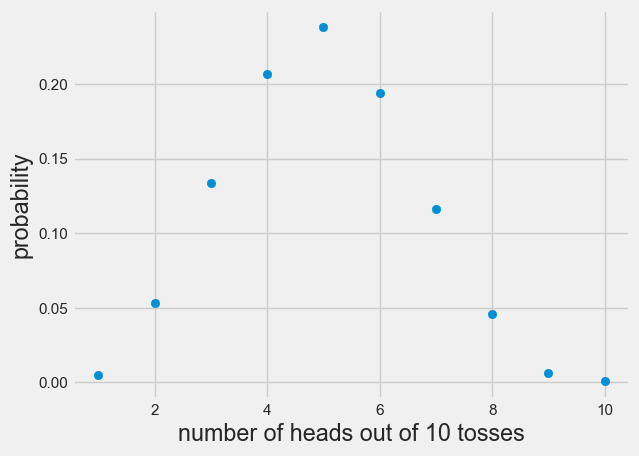

In [105]:
# count the occurrence of each number
head_occu_count = Counter(samples) 

# calculate the probabilities as the number of occurences / size
head_proba = [val/size for val in head_occu_count.values()]

# plot the distribution
plt.scatter(x=head_occu_count.keys(), y=head_proba)
plt.xlabel('number of heads out of 10 tosses')
plt.ylabel('probability')

# show the plot
plt.show()

**From the distribution, we can see that the probability of having four heads out of ten trials is around 0.2.**

### Normal Distribution (Continuous Distribution)

Normal distribution with the mean and variance parameters is a continuous probability distribution.

A normal distribution, also known as a Gaussian distribution, is a probability distribution that is symmetric around the mean, showing that data near the mean are more frequent in occurrence than data far from the mean. 
In a graph, the normal distribution will appear as a bell curve.

In [ ]:
# loc = mean (“a centre”) of the distribution.
# scale = standard deviation (a spread or “a width”) of the distribution.

samples = np.random.normal(loc=0, scale=1, size = 1000000)

# np.random.normal() takes mean and standard deviation as input parameters.

# In the example above, we generated a normal distribution with mean = 0 and std = 1.

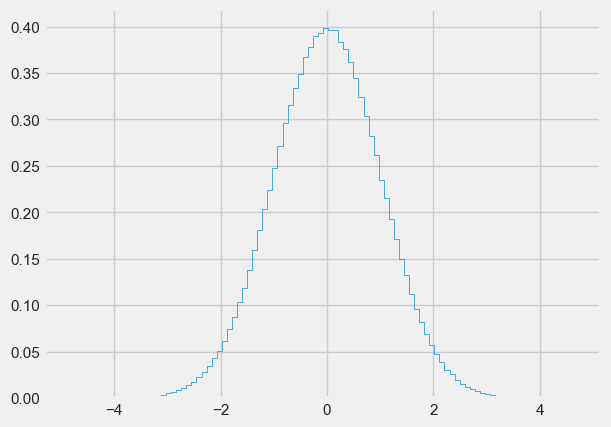

In [107]:
plt.hist(samples, density=True, histtype="step", bins=100)

# show the plot
plt.show()

The probability that we take a number smaller than zero from our sample array from the previous example equals 0.5 
(because the area under the PDF from minus infinity to zero is 0.5).

But how does our PDF change with different parameters of the normal distribution?

Let's try a couple of options and plot the results. In the first example, we will change the values of std parameter.

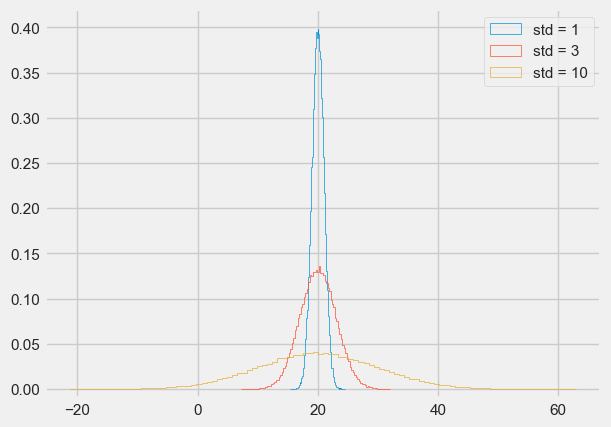

In [108]:
samples_std1 = np.random.normal(20, 1, size=100000)
samples_std3 = np.random.normal(20, 3, size=100000)
samples_std10 = np.random.normal(20, 10, size=100000)

# make histograms
plt.hist(samples_std1, density = True, histtype="step", bins=100)
plt.hist(samples_std3, density = True, histtype="step", bins=100)
plt.hist(samples_std10, density = True, histtype="step", bins=100)

# make a legend, set limits, and show the plot
plt.legend(('std = 1', 'std = 3', 'std = 10'))
plt.ylim(-0.01, 0.42)
plt.show()

As we can see from the PDFs, the higher the std value is the more spread out the distribution.

But what will happen when we change the values of the mean parameter?

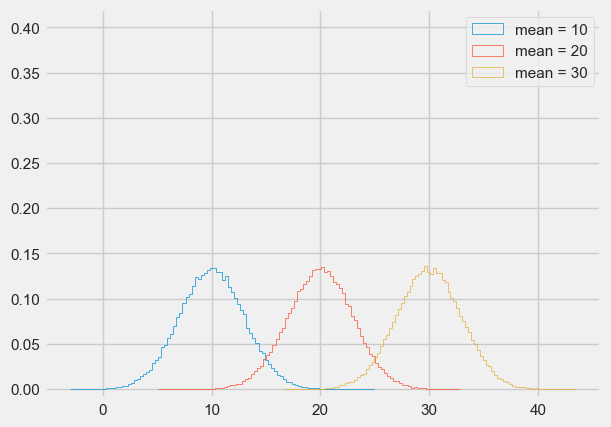

In [113]:
samples_std1 = np.random.normal(10, 3, size=100000)
samples_std3 = np.random.normal(20, 3, size=100000)
samples_std10 = np.random.normal(30, 3, size=100000)

# make histograms
plt.hist(samples_std1, density = True, histtype="step", bins=100)
plt.hist(samples_std3, density = True, histtype="step", bins=100)
plt.hist(samples_std10, density = True, histtype="step", bins=100)

# make a legend, set limits, and show the plot
plt.legend(('mean = 10', 'mean = 20', 'mean = 30'))
plt.ylim(-0.01, 0.42)
plt.show()